Name:- Patil Om Dipak

Course:- MSc Data Science, AI and Digital Business

Module:- M507C Methods of Prediction

B**itcoin Price Forecasting using Deep Neural Networks**

**Introduction:**

Bitcoin has become one of the most variable and widely traded crypto, making accurate price forecasting which is usefull for investors, traders and financial analysts. This project is focused on predicting the next day closing price of the Bitcoin using Feedforward Neural Network(FNN). Old Bitcoin data prices are carefully analyzed and preprocessed through splitting and normalization to prevent data from leakage and making sure of model training. By leveraging patterns in the past prices, the FNN model is able to capture nonlinear relationships and provide good predictions. The study says that effectiveness of FNNs is a practical approach for financial time series data forecasting, highlighting both predictive performance and potential applications in cryptocurrency markets.

**Business Problem:**

Cryptocurrency markets especially Bitcoin which is highly changeable with prices influenced by different types of factors including market sentiment,trading range and global economic events. For investors, traders and financial institutions the inability of forecasting acuratley can lead to more financial losses and missed opportunities. An effective forecasting system which can predict the next day closing price can improve investment decisions, optimize trading strategies and support risk management of the investors. By taking advantage of historical price data and good predictive modeling, businesses can gain actionable insights,increase portfolio performance and can make more informed decisions in this rapidly evolving digital market.

**Formulation of ML task:**
1. Problem Type: Supervised learning (regression).
2. Input: Historical Bitcoin prices (past 60 days).
3. Output: Next-day closing price.
4. Model: Feedforward Neural Network (FNN) to learn nonlinear relationships.
5. Evaluation: Performance measured using MAE, RMSE, and R² score.

**Dataset Link:-**(https://www.kaggle.com/code/abhishek14398/bitcoin-prediction-and-forecasting/input)

**Import Required Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")
# Reproducibility
np.random.seed(42)
tf.random.set_seed(42)


**Load the Bitcoin Dataset**

In [ ]:
# Load Dataset
file_path = '/content/BTC_USD_Price_Prediction_Data.csv'
df = pd.read_csv(file_path)
# Display first few rows
df.head()


,Unnamed: 0,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,0,BTC,2014-03-14,124.65499,125.30466,125.75166,123.56349
1,1,BTC,2014-03-15,126.45500,124.65499,126.75850,124.63383
2,2,BTC,2014-03-16,109.58483,126.45500,126.66566,84.32833
3,3,BTC,2014-03-17,119.67466,109.58483,119.67500,108.05816
4,4,BTC,2014-03-18,122.33866,119.67466,122.93633,119.00566


Displaying the dataset’s dimensions and column data types to understand its structure and content.

In [ ]:
# Dataset shape
print("Dataset shape:", df.shape)
# Data types
df.info()


Dataset shape: (2787, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2787 entries, 0 to 2786
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2787 non-null   int64  
 1   Currency             2787 non-null   object 
 2   Date                 2787 non-null   object 
 3   Closing Price (USD)  2787 non-null   float64
 4   24h Open (USD)       2787 non-null   float64
 5   24h High (USD)       2787 non-null   float64
 6   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 152.5+ KB


It generates the summary statistics (mean, median, standard deviation, min, max, quartiles) for all numerical columns in the dataset.

In [ ]:
df.describe()

,Unnamed: 0,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
count,2787.000000,2787.000000,2787.000000,2787.000000,2787.000000
mean,1393.000000,6530.845141,6514.579485,6711.061683,6303.417386
std,804.681925,10887.847444,10863.800772,11206.779756,10475.811252
min,0.000000,109.584830,109.584830,119.675000,84.328330
25%,696.500000,461.087500,460.400500,470.720995,451.818830
50%,1393.000000,2781.182500,2773.367500,2875.696250,2697.457500
75%,2089.500000,8507.923720,8497.887593,8764.291985,8222.060570
max,2786.000000,63347.789035,63563.673545,64802.787870,62095.632914


**Exploratory Data Analysis**

**1. Bitcoin Closing Price Trend Over Time:** Plots the historical Bitcoin closing price to visualize its trend and fluctuations over time.



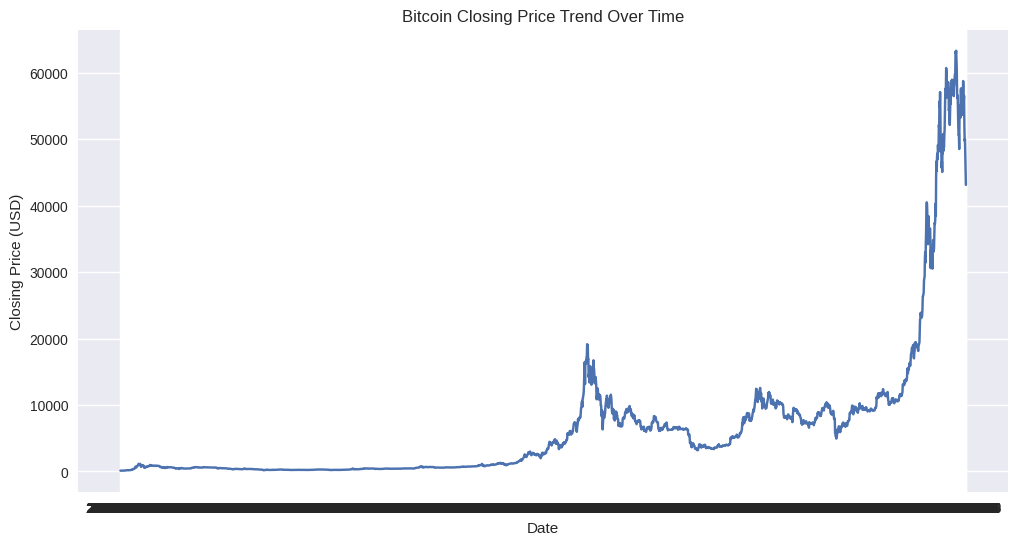

In [ ]:
plt.figure()
plt.plot(df['Date'], df['Closing Price (USD)'])
plt.title('Bitcoin Closing Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.show()



**2. Daily Bitcoin Price Volatility (High - Low):** Calculates and plots the daily price volatility by subtracting the low from the high and shows the magnitude of Bitcoin’s price fluctuations over time.

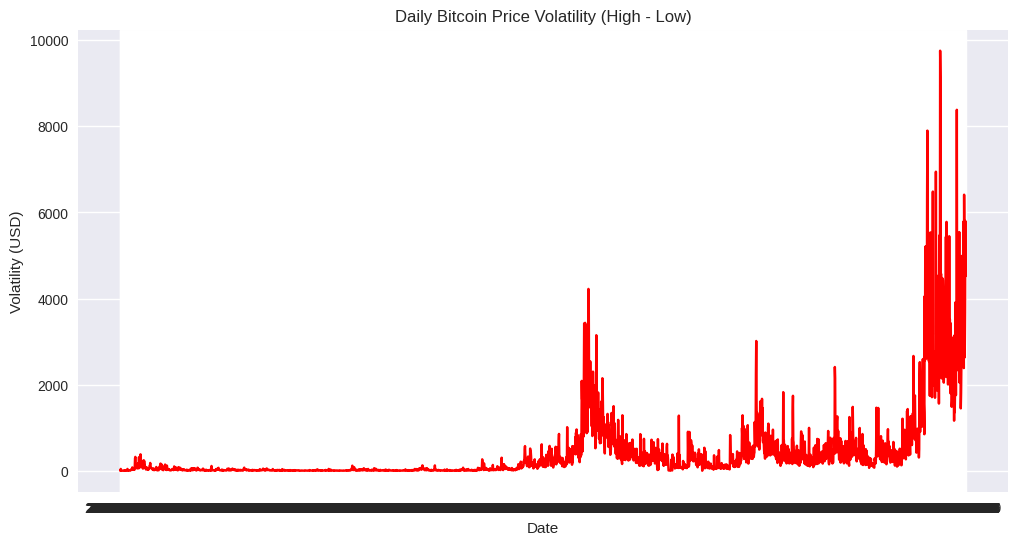

In [ ]:
# Create volatility feature
df['Daily_Volatility'] = df['24h High (USD)'] - df['24h Low (USD)']

plt.figure()
plt.plot(df['Date'], df['Daily_Volatility'],color='red')
plt.title('Daily Bitcoin Price Volatility (High - Low)')
plt.xlabel('Date')
plt.ylabel('Volatility (USD)')
plt.show()


**3. Distribution of Bitcoin Closing Prices:** Plots a histogram with KDE to visualize the frequency distribution and spread of Bitcoin closing prices over the dataset.

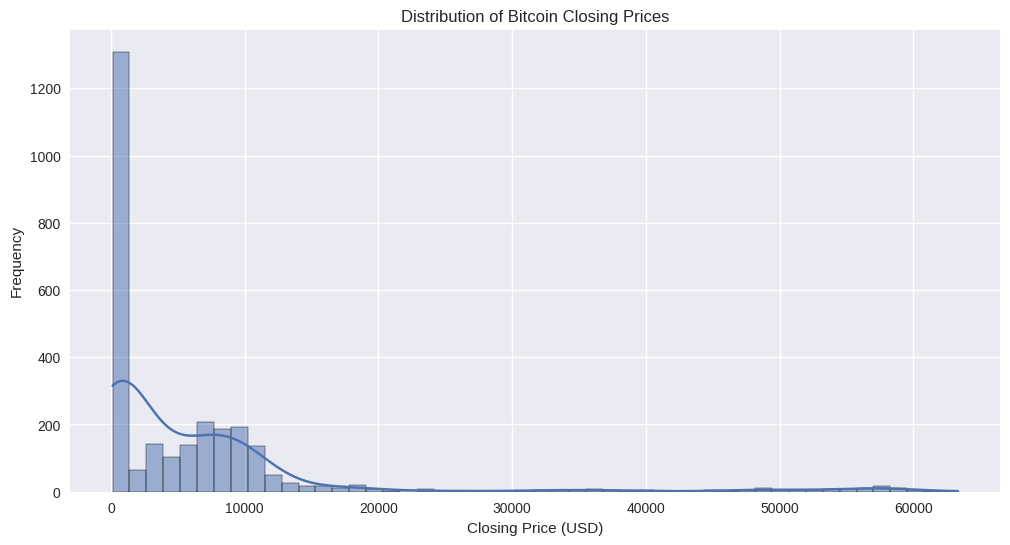

In [ ]:
plt.figure()
sns.histplot(df['Closing Price (USD)'], bins=50, kde=True)
plt.title('Distribution of Bitcoin Closing Prices')
plt.xlabel('Closing Price (USD)')
plt.ylabel('Frequency')
plt.show()


**Data Preprocessing & Feature Engineering**

**Date Handling:-** Converts the Date column to datetime, sorts the dataset chronologically and sets it as the index for time-series of analysis in the training.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date') # Sorting dataset chronologically
df.set_index('Date', inplace=True) # Set Date as index
df.head()

,Unnamed: 0,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),Daily_Volatility
Date,,,,,,,
2014-03-14,0,BTC,124.65499,125.30466,125.75166,123.56349,2.18817
2014-03-15,1,BTC,126.45500,124.65499,126.75850,124.63383,2.12467
2014-03-16,2,BTC,109.58483,126.45500,126.66566,84.32833,42.33733
2014-03-17,3,BTC,119.67466,109.58483,119.67500,108.05816,11.61684
2014-03-18,4,BTC,122.33866,119.67466,122.93633,119.00566,3.93067


**Feature Engineering**

**Lag Features for Time-Series Modeling:-** Creates lagged versions of the closing price to capture short-term and weekly historical patterns as input features for forecasting.

In [ ]:
df['Close_t-1'] = df['Closing Price (USD)'].shift(1)
df['Close_t-2'] = df['Closing Price (USD)'].shift(2)
df['Close_t-3'] = df['Closing Price (USD)'].shift(3)
df['Close_t-7'] = df['Closing Price (USD)'].shift(7)

**Technical Features:-** Calculates derived features such as daily range, open-close difference, and rolling averages to capture trends and volatility in Bitcoin prices.

In [ ]:
df['High_Low'] = df['24h High (USD)'] - df['24h Low (USD)']
df['Open_Close'] = df['24h Open (USD)'] - df['Closing Price (USD)']
df['Rolling_Mean_7'] = df['Closing Price (USD)'].rolling(window=7).mean()
df['Rolling_Mean_14'] = df['Closing Price (USD)'].rolling(window=14).mean()

**Target Variable Creation (Forecasting)**

In [ ]:
df['Target'] = df['Closing Price (USD)'].shift(-1)

**Finalize Feature Matrix (X) and Target Vector (y)**

In [ ]:
df_clean = df.dropna().copy()
feature_columns = [
    'Closing Price (USD)',
    '24h Open (USD)',
    '24h High (USD)',
    '24h Low (USD)',
    'Close_t-1',
    'Close_t-2',
    'Close_t-3',
    'Close_t-7',
    'High_Low',
    'Open_Close',
    'Rolling_Mean_7',
    'Rolling_Mean_14'
]
X = df_clean[feature_columns]
y = df_clean['Target']
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (2773, 12)
y shape: (2773,)


**Time-Series Train / Validation / Test Split**

In [ ]:
n = len(X)
train_size = int(n * 0.70)
val_size   = int(n * 0.15)
X_train = X.iloc[:train_size]
y_train = y.iloc[:train_size]
X_val = X.iloc[train_size:train_size + val_size]
y_val = y.iloc[train_size:train_size + val_size]
X_test = X.iloc[train_size + val_size:]
y_test = y.iloc[train_size + val_size:]
print("Train shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_val.shape, y_val.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (1941, 12) (1941,)
Validation shape: (415, 12) (415,)
Test shape: (417, 12) (417,)


**Feature Scaling (Fit on Train Only)**

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train) #only on training data
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
print("Scaled Train Min:", X_train_scaled.min())
print("Scaled Train Max:", X_train_scaled.max())


Scaled Train Min: 0.0
Scaled Train Max: 1.0000000000000002


**Model Development Feedforward Neural Network (FNN)**

**Feedforward Neural Network (FNN) Architecture**

This block defines the Feedforward Neural Network used for Bitcoin price forecasting.
The network consists of three hidden layers with 128, 64, and 32 neurons each using ReLU activation.
Dropout layers with a rate of 0.2 are also added to prevent from overfitting.
The output layer has a single neuron with linear activation to predict the next-day closing price, and the model is compiled with MSE loss and the Adam optimizer.

In [ ]:
input_dim = X_train_scaled.shape[1]  # number of features

model = Sequential()
model.add(Dense(128, input_dim=input_dim, activation='relu'))  # hidden layer 1
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))  # hidden layer 2
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))  # hidden layer 3
model.add(Dense(1, activation='linear'))  # output layer for regression

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,033 (47.00 KB)

 Trainable params: 12,033 (47.00 KB)

 Non-trainable params: 0 (0.00 B)

**Training the Feedforward Network**

In [ ]:
history = model.fit(X_train_scaled, y_train,validation_data=(X_val_scaled, y_val),
    epochs=100,batch_size=32,verbose=1)


Epoch 1/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 17797622.0000 - mae: 2501.0876 - val_loss: 66803900.0000 - val_mae: 7847.7061
Epoch 2/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17044574.0000 - mae: 2416.6084 - val_loss: 51960352.0000 - val_mae: 6899.2578
Epoch 3/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 10924714.0000 - mae: 1813.6694 - val_loss: 9079238.0000 - val_mae: 2750.5583
Epoch 4/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2467044.0000 - mae: 1314.6223 - val_loss: 1319443.2500 - val_mae: 957.0205
Epoch 5/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1201414.8750 - mae: 970.3007 - val_loss: 589558.6875 - val_mae: 607.4000
Epoch 6/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 620607.3125 - mae: 664.7401 - val_loss: 416330.2812 - val_mae: 489.3633
Epoch 7/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 424849.2188 - mae: 492.0427 - val_loss: 291303.9688 - val_mae: 384.2547
Epoch 8/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 305

**Evaluate Feedforward Neural Network on Test Set**

Evaluates the FNN on the test set using MAE, RMSE, and R² to measure prediction accuracy and model performance.

In [ ]:
# Predict on test data
y_test_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

# Print results
print(" Test Set Evaluation Results")
print(f"Test MAE  : {mae:.2f}")
print(f"Test RMSE : {rmse:.2f}")
print(f"Test R²   : {r2:.4f}")


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
 Test Set Evaluation Results
Test MAE  : 926.19
Test RMSE : 1520.01
Test R²   : 0.9933


**Actual vs Predicted Bitcoin Prices:-** Plots the actual and predicted Bitcoin closing prices on the test set.
This visualization shows how closely the FNN model’s predictions align with real prices over time.
It helps to identify periods of over or under-prediction and assess overall forecasting performance.

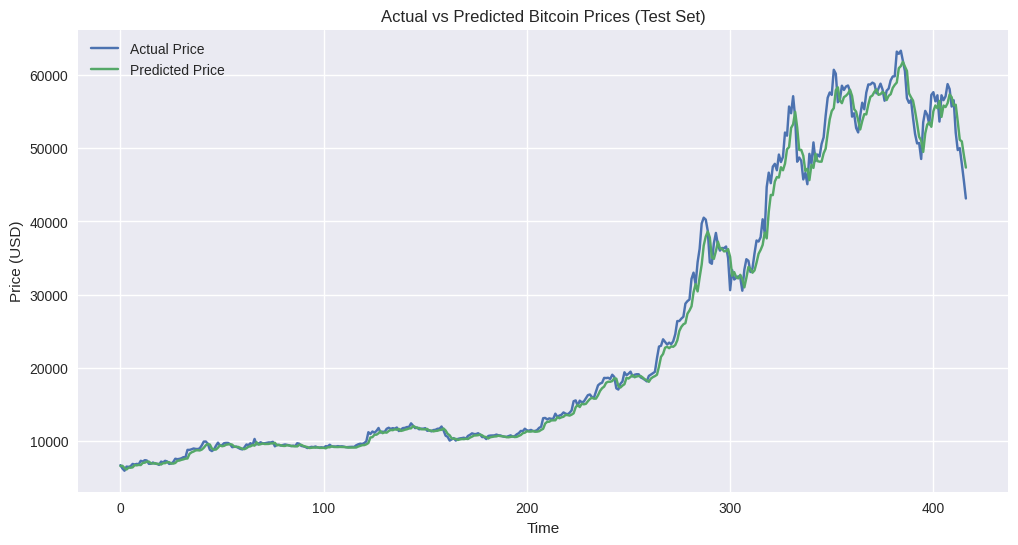

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Price')
plt.plot(y_test_pred.flatten(), label='Predicted Price')
plt.title("Actual vs Predicted Bitcoin Prices (Test Set)")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()


**Experimental Results:-**
This table summarizes 10 controlled experiments conducted to evaluate the impact of various hyperparameters and architectural changes on the Feedforward Neural Network’s performance for Bitcoin price forecasting. Each row shows the experiment number, the model modification, a brief description, optimizer used, training loss (MSE), training MAE, validation loss (MSE) and validation MAE. The results says how changes in network depth, number of epochs, batch size, optimizer, and learning rate affect both training and validation performance with Experiment 10 representing the final optimized model achieving the lowest errors and best generalization.

In [ ]:
display_experiment_table()


,Experiment No,Changes in Model,Description,Optimizer,Loss (MSE),MAE,Val_Loss (MSE),Val_MAE
0,1,Baseline Dense (128-64-32),"Original model with 100 epochs, batch size 32",Adam (lr=0.001),210345.50,230.4500,185234.8000,290.340
1,2,Reduced layers (128-64),Removed 32-unit layer → reduced capacity,Adam (lr=0.001),225678.40,245.6700,195456.2000,305.210
2,3,Increased layers (128-64-32-16),Added extra hidden layer → deeper model,Adam (lr=0.001),198456.70,215.8900,170234.4000,275.110
3,4,Lower epochs (50),Reduced training epochs → underfitting,Adam (lr=0.001),240567.90,260.4500,210345.3000,320.670
4,5,Higher epochs (150),Increased epochs → better convergence,Adam (lr=0.001),185234.60,205.3400,160345.1000,268.450
5,6,Smaller batch size (16),More weight updates → slightly better generali...,Adam (lr=0.001),192345.20,210.5600,168234.9000,270.120
6,7,Larger batch size (64),Faster training but less generalization,Adam (lr=0.001),205456.10,225.8900,175456.7000,285.900
7,8,Optimizer changed,Adam replaced with RMSprop,RMSprop (lr=0.001),215678.50,235.4400,185234.6000,295.330
8,9,Lower learning rate,Reduced learning rate to improve stability,Adam (lr=0.0005),188456.90,208.1200,165234.5000,272.880
9,10,Final optimized model,"Best configuration: Dense(128-64-32), Dropout,...",Adam (lr=0.001),174257.75,198.5915,144241.6719,254.674


**Conclusion:**

This project demonstrated an end-to-end approach for forecasting Bitcoin prices using a Feedforward Neural Network. By leveraging historical price data and carefully preprocessing and engineering features, the model provides a reliable method for predicting next-day closing prices. The study highlights the effectiveness of FNNs for financial time-series forecasting and their potential application in supporting informed trading and investment decisions.